In [1]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(50)

from DATA import MG17
from Reservoir import Reservoir

In [2]:
data = MG17(True, [80,0,10])

X_TR, _ = data.TR()

In [3]:
from IPReservoir import IPReservoir
from ESN import EchoStateNetwork
from IPMask import IPMask
from Reservoir import Reservoir
from Metrics import *

In [4]:
N = 50
init_point = Reservoir(N=N, desired_rho=0.5, bias = False,)
names = ["Gaussian", "Bimodal", "Soft Trimodal", "Edgy Trimodal"]

masks = [
    IPMask.gaussian(N, std=0.2),
    IPMask.bimodal(N, mu=0.75, std=0.15),
    IPMask.trimodal(N, linear_rate=0.5, std_bim=0.15), 
    IPMask.trimodal(N, linear_rate=0.2, mu=0.82, std_bim=0.1)
    ]

models = [IPReservoir.clone(init_point) for _ in range(len(names))]

## Sine Wave Building Up

Mean of f  0.0


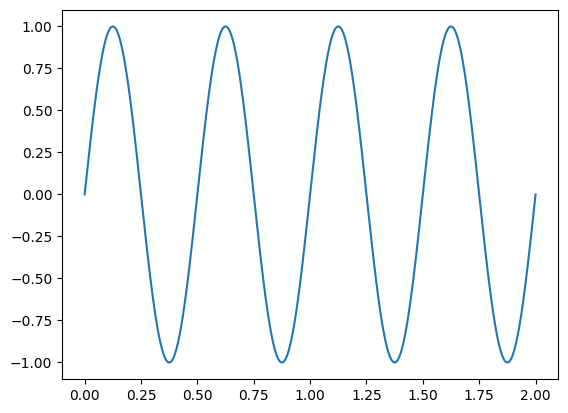

In [5]:
starttime = 0.0
endtime = 2.0
steps = 5000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

## Train IP on Sine Wave

In [6]:
for model, mask in zip(models, masks): 
    model.set_IP_mask(mask)
    model.IP_online(X_TR, epochs=5, eta=0.000015,verbose=True)

- Epoch: 1) | KL Divergence value: 0. | Spectral radius: 0.5620603561401367
- Epoch: 2) | KL Divergence value: 0. | Spectral radius: 0.6179172992706299
- Epoch: 3) | KL Divergence value: 0. | Spectral radius: 0.6691270470619202
- Epoch: 4) | KL Divergence value: 0. | Spectral radius: 0.71668940782547
- Epoch: 5) | KL Divergence value: 0. | Spectral radius: 0.7612887024879456
- Epoch: 1) | KL Divergence value: 0. | Spectral radius: 0.5620571374893188
- Epoch: 2) | KL Divergence value: 0. | Spectral radius: 0.6179153919219971
- Epoch: 3) | KL Divergence value: 0. | Spectral radius: 0.6691258549690247
- Epoch: 4) | KL Divergence value: 0. | Spectral radius: 0.7166863083839417
- Epoch: 5) | KL Divergence value: 0. | Spectral radius: 0.7612856030464172
- Epoch: 1) | KL Divergence value: 0. | Spectral radius: 0.5620585680007935
- Epoch: 2) | KL Divergence value: 0. | Spectral radius: 0.6179166436195374
- Epoch: 3) | KL Divergence value: 0. | Spectral radius: 0.6691255569458008
- Epoch: 4) | 

KL:  tensor(0.0508)


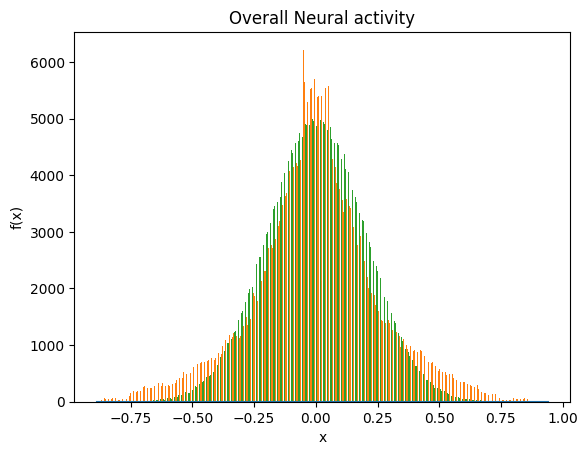

KL:  tensor(0.0162)


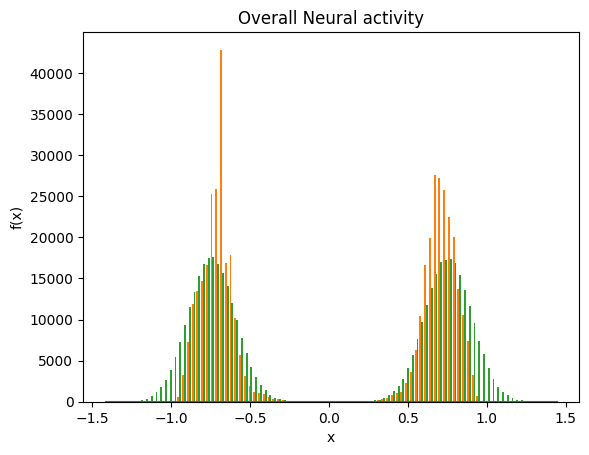

KL:  tensor(0.0277)


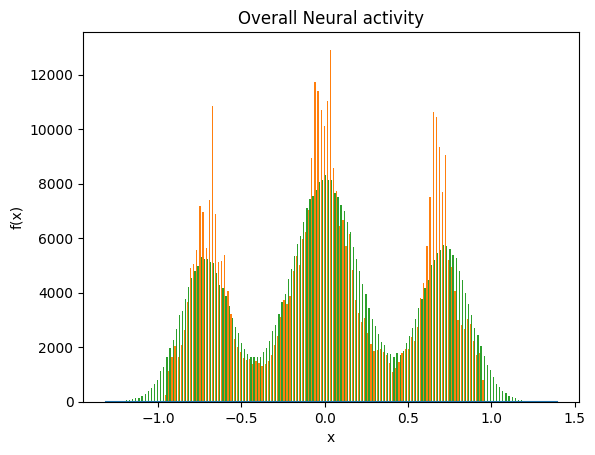

KL:  tensor(0.0143)


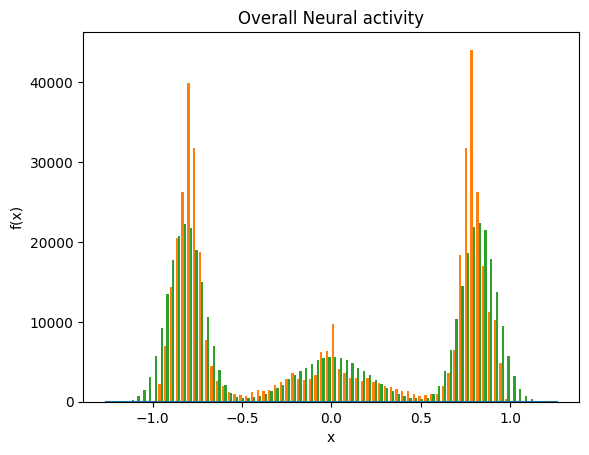

In [7]:
for model in models: 
    print("KL: ", model.evalaute_loss(X_TR))
    model.plot_neural_activity(X_TR)

## Visualize reservoir distortions

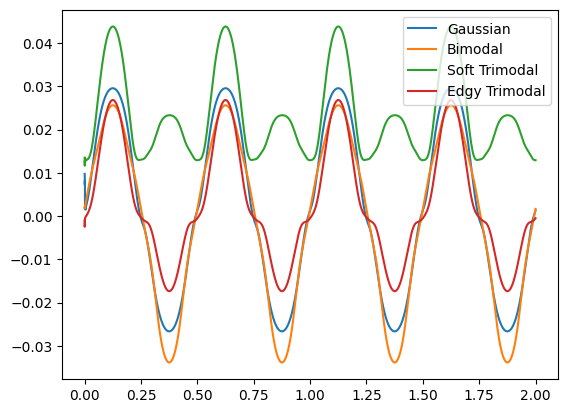

In [8]:
for model,name in zip(models, names): 
    plt.plot(t, model.predict(f).mean(dim=1))
plt.legend(names)

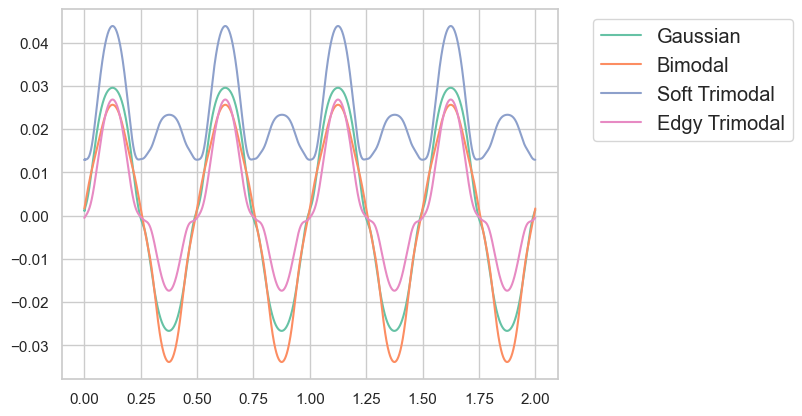

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and palette
sns.set(style="whitegrid", palette="Set2")

for model, name in zip(models, names): 
    plt.plot(t, model.predict(f).mean(dim=1), label=name)

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize="large")

plt.show()